Rscript ../correct_barcode.R --barcode_file=SRR14048756_S1_L001_R2_001.fastq.gz  --whitelist_file=/media/leon/Masha/ATAC/cellranger-atac-2.1.0/lib/python/atac/barcodes/737K-cratac-v1.txt --path_output_fq=./bc_corrected
cd bc_corrected
awk '$2 != $3 {print $2 "\t" $3}' tagfile_SRR14048756_S1_L001_R2_001.fastq.gz.txt > subset.txt

Summary (correct_barcode): total valid: 85024836; total corrected: 3800552; total discarded: 1632494.

In [1]:
import pandas as pd

In [3]:
# колонка 1 - последовательности из fastq-файла, колонка 2 - на что исправлены
df = pd.read_csv("/media/leon/Polina/atac_rna/raw_fastqs/bc_correction/SRR14048756/subset.txt", sep='\t', header=None, index_col=1)
df

,0
1,
ATGTCTTAGCTGATTC,ATGTCTTAGCTGATTA
TGGTCAACAGTAGGCA,TGGTCCACAGTAGGCA
TTCATTGGTCATAAGA,GTCATTGGTCATAAGA
ATCCTGCCAAGCGTCC,ATCTTGCCAAGCGTCC
AAACTGCCAATACTGC,AAACAGCCAATACTGC
...,...
GCGTTGGTCACTGGTA,NCGTTGGTCACTGGTA
GGAACCCGTACGCCCA,NGAACCCGTACGCCCA
CTGTATTTCACATCCC,NTGTATTTCACATCCC


In [4]:
## Result: 878687/1902161 are 1 mismatch away from whitelist barcodes.
len(set(df[0]))

878687

In [5]:
for i in "alpha beta gamma delta EC stellate acinar ductal immune".split():
    barcodes = open(f"/media/leon/Masha/barcodes/SRR14048756_{i}.txt").read().splitlines()", "
    print(len(barcodes))

2660
1742
92
304
30
39
177
93
35


In [6]:
barcodes = open(f"/media/leon/Masha/barcodes/SRR14048756_alpha.txt").read().splitlines()", "
barcodes = [i[3:] for i in barcodes]
barcodes[:10]

['AAACGAAAGGAAGGTA',
 'AAACGAACAAACGACG',
 'AAACGAAGTCTGGGCT',
 'AAACGAAGTGGACAGT',
 'AAACGAAGTGTCGTGC',
 'AAACGAATCACTACCC',
 'AAACGAATCTTCGTTA',
 'AAACTCGAGACTAGGC',
 'AAACTCGCAAGCAATA',
 'AAACTCGGTAGAACGC']

In [10]:
# сабсет датафрейма для которого индексы совпадают со значениями из списка barcodes
adf = df.loc[barcodes, 0].to_frame()
adf

,0
1,
AAACGAAAGGAAGGTA,AAACGAAAGGAATGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
AAACGAAAGGAAGGTA,AAACGAAAGGAAGCTA
AAACGAAAGGAAGGTA,AAACGAAAGGACGGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
...,...
TTTGTGTTCATGTTCT,NTTGTGTTCATGTTCT
TTTGTGTTCATGTTCT,TTTGTGTTCATGTTGT
TTTGTGTTCATGTTCT,GTTGTGTTCATGTTCT


In [11]:
print(len(barcodes))
print(len(adf.index.unique()))
adf.index.unique()

2660
2660


Index(['AAACGAAAGGAAGGTA', 'AAACGAACAAACGACG', 'AAACGAAGTCTGGGCT',
       'AAACGAAGTGGACAGT', 'AAACGAAGTGTCGTGC', 'AAACGAATCACTACCC',
       'AAACGAATCTTCGTTA', 'AAACTCGAGACTAGGC', 'AAACTCGCAAGCAATA',
       'AAACTCGGTAGAACGC',
       ...
       'TTTGGTTCAAATAGTG', 'TTTGGTTCACGCTCAG', 'TTTGGTTGTTGTCGGC',
       'TTTGGTTTCCATTGAG', 'TTTGGTTTCGCGCCAA', 'TTTGTGTAGCCATCAT',
       'TTTGTGTAGGGAAATG', 'TTTGTGTCATGCGACC', 'TTTGTGTTCAGTTGAC',
       'TTTGTGTTCATGTTCT'],
      dtype='object', name=1, length=2660)

In [12]:
# неправильные последовательности которые были исправлены на баркоды из списка barcodes
print(set(adf[0]))
print(len(set(adf[0])))

{'ATGTCCTAGAGCGAAA', 'TTTGCGCAGGTTGTCG', 'TACCTCGGATGGCGAA', 'CTTGGCAGTCTCGGGT', 'GGAAAGGGTATGGTTC', 'CGTGGCAACGACCGAT', 'GCAAGGGCAGTCAGCC', 'CAGAATGCAGCTGATT', 'AAACAGCGTGCGCTCA', 'CATAACGCACAGTAGC', 'NACATGGAGCCGCTGT', 'TGACACCGTCAACTAC', 'TTGGGTGTCTCGACCT', 'CTAGGGCGCAGCCGGT', 'TAGCTTTTCGCGATTC', 'CACCTGAGTAATGCAA', 'GTGACATAGGTCTTTC', 'AGGCGTTAGTGTCGGA', 'AGTGGACAGTGTCGCC', 'CCAATGAAGTTGCGGC', 'GTCGTAATCACCCCGA', 'GCAGCTGAAACTAGAA', 'GCCCTAAGTAGGTCTT', 'TGGATTTTCGTGGAAG', 'TGAGGTACATCGTGAT', 'CGATGGATCTGGGCGT', 'GTATCTGGTTCCCTTG', 'TCCATCGAGTTATTAG', 'NCAGTCCTCAACTTGG', 'TGGAAGGTAACAACAC', 'CTCAAGCAGGCACCTC', 'CGCAATAAGGAGACTA', 'TACGGATGTTACGGAT', 'AGCCGCTTCACAACAC', 'AGCGTGTTCTTGTACT', 'TGGGTTATTTCCACTG', 'NCAAGGTCATGCGCTG', 'TGCTAGTTCGGAAAGC', 'CTCTCGACAACTCACC', 'TGGCGCAAGTTACAAC', 'CTGCGGTGTGTTGGTT', 'TGTCCAGAGTACCTCA', 'GTAATTTCAAGCAGGT', 'TCGATTGTCGTGGAAG', 'GCTGTTCAGTTGCCGA', 'ATGCATGAGATATAAG', 'CAGGAATCACTCGCAG', 'GATGGCTCAGGGTACA', 'GAGGCTCCAGCTATCC', 'GACCGACAGGTACCTA',

In [ ]:
## 30 реальных баркодов из списка SRR14048756_EC.txt и 830 исправленных на них ???????

In [13]:
adf = adf.drop_duplicates()
adf

,0
1,
AAACGAAAGGAAGGTA,AAACGAAAGGAATGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTC
AAACGAAAGGAAGGTA,AAACGAAAGGAAGCTA
AAACGAAAGGAAGGTA,AAACGAAAGGACGGTA
AAACGAAAGGAAGGTA,AAACGAAAGGAAGGTT
...,...
TTTGTGTTCATGTTCT,TTTGTGCTCATGTTCT
TTTGTGTTCATGTTCT,TTTGTGTTCATATTCT
TTTGTGTTCATGTTCT,CTTGTGTTCATGTTCT


In [14]:
# сколько раз встречался каждый ошибочный баркод
df[0].value_counts()

0
GTGGATGGTAGACACG    2862
GATCATGCATGGCCTC    2098
NGGACTGCAGAATGCG    2032
TGTGTCATCGGGCTCA    2026
NATACGCAGTTACCAC    2024
                    ... 
CTTCTCACAGTTAAAG       1
TTAAGACTCTCGCGTT       1
GTTATTCCACCGCTCG       1
ACAAGCTTCCCGAAAC       1
NCTCGAGAGGTCACTT       1
Name: count, Length: 878687, dtype: int64

In [108]:
# сколько разных ошибочных вариантов было для каждого реального баркода
adf.groupby(adf.index)[0].nunique().sort_values(ascending=False)

1
AGCCTTCCACATAAAG    48
TTTGAGGTCGGCATAT    48
AGCGATTGTTGGCTAT    48
AGTTACGTCGATAGGG    47
CCGTAGGAGATGGGAA    47
                    ..
CGTAAACAGACTTCCA    13
AGCGTGCCACCATTCC    13
GCGGAAAAGGCTGGAT    12
CTTGTCGCAAACCGAG    12
CGATGATTCTTCATAC    11
Name: 0, Length: 2660, dtype: int64

In [18]:
adf.loc['AGCCTTCCACATAAAG', 0].drop_duplicates().sort_values(ascending=False).to_frame()

,0
1,
AGCCTTCCACATAAAG,TGCCTTCCACATAAAG
AGCCTTCCACATAAAG,NGCCTTCCACATAAAG
AGCCTTCCACATAAAG,GGCCTTCCACATAAAG
AGCCTTCCACATAAAG,CGCCTTCCACATAAAG
AGCCTTCCACATAAAG,ATCCTTCCACATAAAG
AGCCTTCCACATAAAG,ANCCTTCCACATAAAG
AGCCTTCCACATAAAG,AGTCTTCCACATAAAG
AGCCTTCCACATAAAG,AGGCTTCCACATAAAG
AGCCTTCCACATAAAG,AGCTTTCCACATAAAG


/home/leon/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: ylabel='Frequency'>

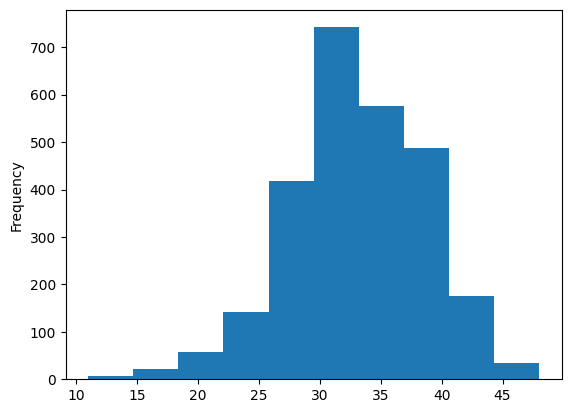

In [19]:
import matplotlib.pyplot as plt

adf.groupby(adf.index)[0].nunique().plot(kind="hist")

In [47]:
samples = [f"SRR140487{i}" for i in range(50, 84)]
samples.extend([f"SRR18593{i}" for i in range(339, 417)])
len(samples)

112

In [48]:
for sample in samples:
    bc_lists = glob.glob(f"/media/leon/Masha/barcodes/{sample}_*.txt")
    print(*bc_lists)

/media/leon/Masha/barcodes/SRR14048750_immune.txt /media/leon/Masha/barcodes/SRR14048750_ductal.txt /media/leon/Masha/barcodes/SRR14048750_gamma.txt /media/leon/Masha/barcodes/SRR14048750_EC.txt /media/leon/Masha/barcodes/SRR14048750_stellate.txt /media/leon/Masha/barcodes/SRR14048750_beta.txt /media/leon/Masha/barcodes/SRR14048750_alpha.txt /media/leon/Masha/barcodes/SRR14048750_acinar.txt /media/leon/Masha/barcodes/SRR14048750_delta.txt
/media/leon/Masha/barcodes/SRR14048751_delta.txt /media/leon/Masha/barcodes/SRR14048751_gamma.txt /media/leon/Masha/barcodes/SRR14048751_acinar.txt /media/leon/Masha/barcodes/SRR14048751_immune.txt /media/leon/Masha/barcodes/SRR14048751_stellate.txt /media/leon/Masha/barcodes/SRR14048751_ductal.txt /media/leon/Masha/barcodes/SRR14048751_beta.txt /media/leon/Masha/barcodes/SRR14048751_EC.txt /media/leon/Masha/barcodes/SRR14048751_alpha.txt
/media/leon/Masha/barcodes/SRR14048752_stellate.txt /media/leon/Masha/barcodes/SRR14048752_ductal.txt /media/leon/

In [81]:
lst = [0, 1, 2, 3]
lst = [i for i in lst if i not in [0, 1]]
lst

[2, 3]

In [87]:
false_fixed_bcs = {
    "SRR18593385" : ['CCCGAAGGATTACTAC',],
    "SRR18593358" : ['AGGCTAATGCTCAACA', 'GGCTAGCACAAAGCTC'],
    "SRR18593390" : ['CACAGGCGATCCAAGA']
}                   

In [88]:
# import pandas as pd
# import glob

# samples = [f"SRR140487{i}" for i in range(50, 84)]
samples = not_in_index_error
# samples.extend([f"SRR18593{i}" for i in range(391, 417)])

# mmATAC_samples_undone = []

def return_rev_compl(bc):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(bc))

for sample in samples:
    bc_lists = glob.glob(f"/media/leon/Masha/barcodes/{sample}_*.txt")
    try:
        df = pd.read_csv(f"/media/leon/Polina/atac_rna/bc_correction/{sample}.txt", sep='\t', header=None, index_col=1)
    except FileNotFoundError:
        print(sample, "not ready yet")
        # mmATAC_samples_undone.append(sample)
        continue
    for i in bc_lists:
        cell_type = i.split('/')[-1].split('.txt')[0].split('_')[1]
        barcodes = open(i).read().splitlines()
        barcodes = [i[3:] for i in barcodes]
        try:
            fixed_bcs = set(df.loc[barcodes, 0])
        except KeyError:
            print(f"trying reverse complement for {sample}")
            barcodes = [return_rev_compl(i) for i in barcodes]
            if sample in false_fixed_bcs:
                barcodes = [i for i in barcodes if i not in false_fixed_bcs[sample]]
            fixed_bcs = set(df.loc[barcodes, 0])
        barcodes.extend(fixed_bcs)
        barcodes = [f"CR_{i}\n" for i in barcodes]
        with open(f"/media/leon/Masha/corrected_barcodes/{sample}_{cell_type}.txt", "w") as file:
            file.writelines(barcodes)
    print(sample, "completed")

trying reverse complement for SRR18593385
trying reverse complement for SRR18593385
trying reverse complement for SRR18593385
trying reverse complement for SRR18593385
SRR18593385 completed
trying reverse complement for SRR18593358
trying reverse complement for SRR18593358
trying reverse complement for SRR18593358
trying reverse complement for SRR18593358
SRR18593358 completed
trying reverse complement for SRR18593390
trying reverse complement for SRR18593390
trying reverse complement for SRR18593390
trying reverse complement for SRR18593390
SRR18593390 completed


In [75]:
not_in_index_error = ["SRR18593385", "SRR18593358", "SRR18593390"]

In [73]:
mmATAC_samples_undone

['SRR18593362',
 'SRR18593389',
 'SRR18593391',
 'SRR18593392',
 'SRR18593393',
 'SRR18593394',
 'SRR18593395',
 'SRR18593396',
 'SRR18593397',
 'SRR18593398',
 'SRR18593399',
 'SRR18593400',
 'SRR18593401',
 'SRR18593402',
 'SRR18593403',
 'SRR18593404',
 'SRR18593405',
 'SRR18593406',
 'SRR18593407',
 'SRR18593408',
 'SRR18593409',
 'SRR18593410',
 'SRR18593411',
 'SRR18593412',
 'SRR18593413',
 'SRR18593414',
 'SRR18593415',
 'SRR18593416']

In [62]:
samples_undone

['SRR14048773',
 'SRR14048774',
 'SRR14048778',
 'SRR14048779',
 'SRR14048783',
 'SRR18593339',
 'SRR18593340',
 'SRR18593341',
 'SRR18593342',
 'SRR18593343',
 'SRR18593344',
 'SRR18593345',
 'SRR18593346',
 'SRR18593347',
 'SRR18593348',
 'SRR18593350',
 'SRR18593356']

In [35]:
return_rev_compl("CGGGATTACGGGTTAT")

'ATAACCCGTAATCCCG'

In [30]:
def return_rev_compl(bc):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(bc))

In [89]:
x = open("/media/leon/Masha/ATAC/cellranger-atac-2.1.0/lib/python/atac/barcodes/737K-cratac-v1.txt").read().splitlines()
x[1]

'GGATAGGGTTAGAGAT'

In [90]:
rc = [return_rev_compl(i) + "\n" for i in x]
rc[1]

'ATCTCTAACCCTATCC\n'

In [91]:
with open("/media/leon/Masha/ATAC/cellranger-atac-2.1.0/lib/python/atac/barcodes/RC_737K-cratac-v1.txt", "w") as file:
    file.writelines(rc)

In [92]:
return_rev_compl("CAGACGCGCTATAACC")

'GGTTATAGCGCGTCTG'

In [36]:
x = ["5,9", "7,66", "8,59", "9,4", "8,2", "8,32", "11,34", "6,2", "7,3", "5,1", "8,62", "7,5", "13,3", "6,08", "13,1"]

In [43]:
y = []
for i in x:
    for _ in range(4):
        y.append(i)
print(*y, sep='\n')        

5,9
5,9
5,9
5,9
7,66
7,66
7,66
7,66
8,59
8,59
8,59
8,59
9,4
9,4
9,4
9,4
8,2
8,2
8,2
8,2
8,32
8,32
8,32
8,32
11,34
11,34
11,34
11,34
6,2
6,2
6,2
6,2
7,3
7,3
7,3
7,3
5,1
5,1
5,1
5,1
8,62
8,62
8,62
8,62
7,5
7,5
7,5
7,5
13,3
13,3
13,3
13,3
6,08
6,08
6,08
6,08
13,1
13,1
13,1
13,1
